## BHARAT INTERN

##Titanic Classification (TAKS-2)

In [4]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.shape

(418, 11)

Here one column is less in test dataset which is Survived Column as it is our target column.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0 --> Not Survived

1 --> Survived

In [13]:
# checking missing data

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the Missing Data

In [15]:
train_data = train_data.drop(columns = 'Cabin', axis = 1)
test_data = test_data.drop(columns = 'Cabin', axis = 1)

In [16]:
# filling the missing value of age by mean of the age column

train_data.fillna(train_data['Age'].mean(), inplace=True)
test_data.fillna(test_data['Age'].mean(), inplace=True)

In [17]:
# Finding the mode of "Embarked" column

print(train_data['Embarked'].mode()[0])

S


In [18]:
# replacing the missing values of embarked with the mode

train_data.fillna(train_data['Embarked'].mode()[0], inplace= True)
test_data.fillna(test_data['Embarked'].mode()[0], inplace= True)

In [19]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [21]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

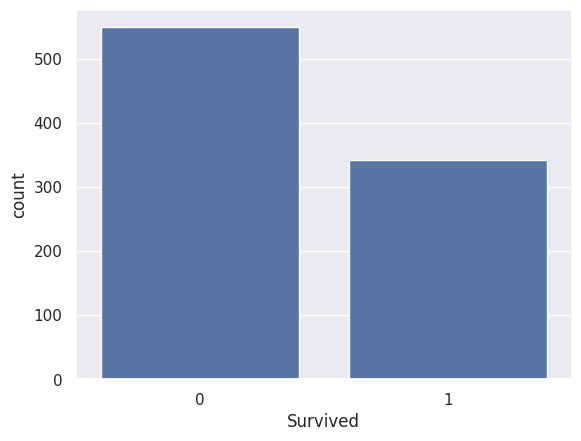

In [22]:
# making count plot for Survived Column

sns.countplot(x = 'Survived', data = train_data)

In [23]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

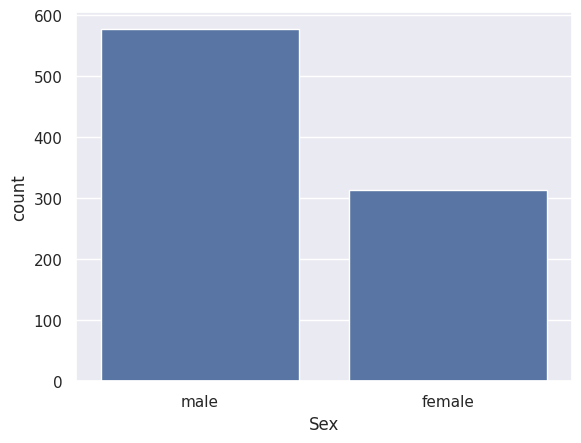

In [24]:
# checking number of male and female

sns.countplot(x = 'Sex', data = train_data)

In [25]:
test_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

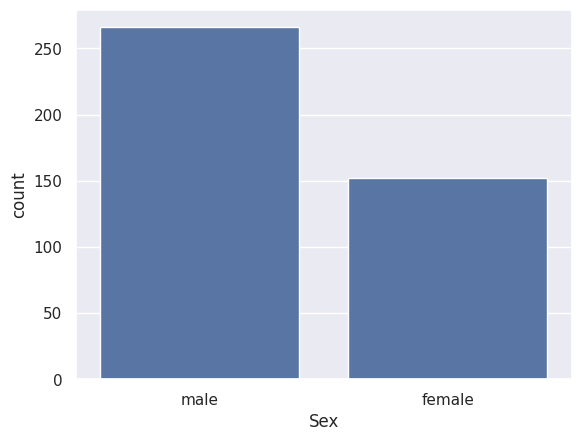

In [26]:
sns.countplot(x = 'Sex', data = test_data)

<Axes: xlabel='Survived', ylabel='count'>

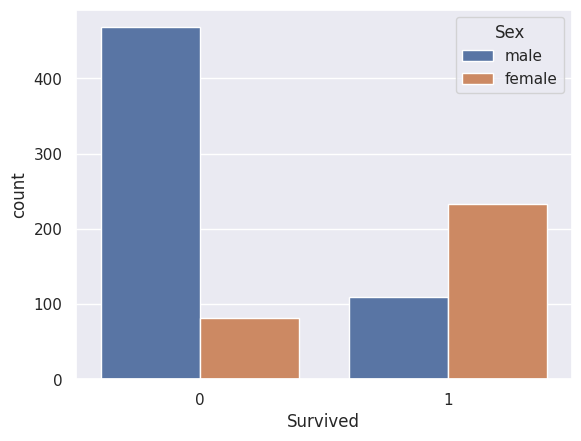

In [27]:
# number of survivors genderwise

sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)

<Axes: xlabel='Pclass', ylabel='count'>

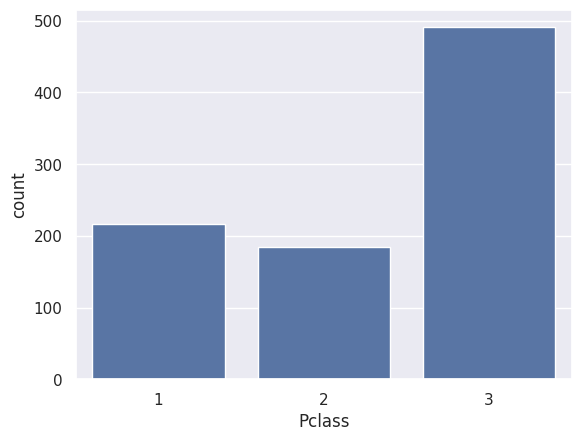

In [28]:
sns.countplot(x = 'Pclass', data = train_data)

<Axes: xlabel='Pclass', ylabel='count'>

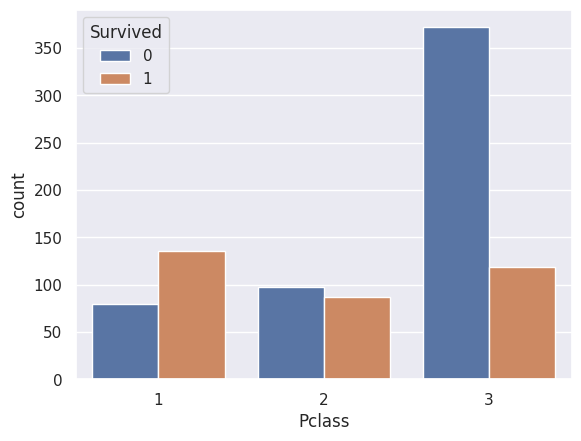

In [29]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data)

Encoding the categorical columns

In [30]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
train_data['Embarked'].value_counts()

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

In [32]:
#converting the categorical data

train_data.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace =True)
test_data.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace =True)

In [33]:
train_data['Embarked'] = train_data['Embarked'].astype(np.int64)

In [34]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


In [35]:
train_data = train_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1)
test_data = test_data.drop(columns = ['Name', 'Ticket', 'Fare'], axis = 1)

In [36]:
train_data['Age'] = train_data['Age'].astype('int32')
train_data['Age'].dtype

dtype('int32')

In [37]:
test_data['Age'] = test_data['Age'].astype('int32')
test_data['Age'].dtype

dtype('int32')

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Embarked  891 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 45.4 KB


In [39]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34,0,0,2
1,893,3,1,47,1,0,0
2,894,2,0,62,0,0,2
3,895,3,0,27,0,0,0
4,896,3,1,22,1,1,0


In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int32
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Embarked     418 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 21.4 KB


In [41]:
combine = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)
combine.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PassengerId
0,0.0,3,0,22,1,0,0,NaN
1,1.0,1,1,38,1,0,1,NaN
2,1.0,3,1,26,0,0,0,NaN
3,1.0,1,1,35,1,0,0,NaN
4,0.0,3,0,35,0,0,0,NaN


In [42]:
train_data = combine[:len(train_data)]
test_data = combine[len(train_data):]

In [43]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PassengerId
0,0.0,3,0,22,1,0,0,NaN
1,1.0,1,1,38,1,0,1,NaN
2,1.0,3,1,26,0,0,0,NaN
3,1.0,1,1,35,1,0,0,NaN
4,0.0,3,0,35,0,0,0,NaN


Seperating features and target

In [44]:
train_data = train_data.drop('PassengerId', axis = 1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3,0,22,1,0,0
1,1.0,1,1,38,1,0,1
2,1.0,3,1,26,0,0,0
3,1.0,1,1,35,1,0,0
4,0.0,3,0,35,0,0,0


In [45]:
train_data['Survived'] = train_data['Survived'].astype('int')
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,0
1,1,1,1,38,1,0,1
2,1,3,1,26,0,0,0
3,1,1,1,35,1,0,0
4,0,3,0,35,0,0,0


In [46]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PassengerId
891,NaN,3,0,34,0,0,2,892.0
892,NaN,3,1,47,1,0,0,893.0
893,NaN,2,0,62,0,0,2,894.0
894,NaN,3,0,27,0,0,0,895.0
895,NaN,3,1,22,1,1,0,896.0


In [47]:
test_data = test_data.drop('Survived', axis = 1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,PassengerId
891,3,0,34,0,0,2,892.0
892,3,1,47,1,0,0,893.0
893,2,0,62,0,0,2,894.0
894,3,0,27,0,0,0,895.0
895,3,1,22,1,1,0,896.0


In [48]:
X_train = train_data.drop('Survived', axis = 1)
Y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 6)
Y_train shape:  (891,)
X_test shape:  (418, 6)


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.8

In [50]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': Y_pred})
output.head()

,PassengerId,Survived
891,892.0,0
892,893.0,0
893,894.0,0
894,895.0,0
895,896.0,1


In [51]:
output['PassengerId'] = output['PassengerId'].astype('int64')

In [52]:
output.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [53]:
output.shape

(418, 2)

In [54]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
